# NAIVE-MATCHING

In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [5]:
healthy_gene = readGenome('CERVICALDNA.fasta')

In [6]:
print(naive('GATT', healthy_gene))
print(len(naive('GATT', healthy_gene)))

[191, 248, 284, 428, 491, 512, 536]
7


In [8]:
reverse_complement_GATT = reverseComplement('AGGT')
print(reverse_complement_GATT)
print(len(naive(reverse_complement_GATT,healthy_gene)))

NameError: name 'reverseComplement' is not defined

In [14]:
print(naive('GCATT', healthy_gene))
print(len(naive('GCATT', healthy_gene)))

[178, 370, 391, 517]
4


In [15]:
reverse_complement_TTAA = reverseComplement('GCATT')
print(reverse_complement_TTAA)
print(len(naive(reverse_complement_TTAA,healthy_gene)))

NameError: name 'reverseComplement' is not defined

In [16]:
print(naive('ACTAAGT', healthy_gene))
complement = reverseComplement('ACTAAGT')
print(naive(complement, healthy_gene))

[]


NameError: name 'reverseComplement' is not defined

In [17]:
print(naive('AGTCGA', healthy_gene))
complement = reverseComplement('AGTCGA')
print(naive(complement, healthy_gene))

[]


NameError: name 'reverseComplement' is not defined

In [18]:
def hamming_distance(s1,s2):
    count = 0
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            count +=1
    return count

In [19]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        subset_dna = t[i:i+len(p)]
        ham_dist = hamming_distance(subset_dna,p)
        if ham_dist <= 2:
            occurrences.append(i)
    return occurrences
print(naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT'))

[0, 4]


In [20]:
print(len(naive_2mm('TTCAAGCC',healthy_gene)))

1


In [21]:
print(naive_2mm('AGGAGGTT',healthy_gene))

[4, 289]


# NAIVE-MATCHING ON FASTA FILE

In [22]:
#function for parsing fasta file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('CERVICALDNA.fasta')
genome[:100]
p = 'GGCGC'
t = genome
print(naive_2mm(p,t))
print(len(naive_2mm(p,t)))

[5, 8, 10, 15, 17, 19, 21, 22, 25, 34, 37, 43, 49, 50, 57, 59, 61, 63, 68, 69, 71, 73, 75, 83, 85, 87, 96, 102, 104, 106, 113, 120, 122, 123, 125, 126, 128, 143, 150, 152, 153, 155, 158, 160, 185, 188, 196, 198, 208, 214, 219, 221, 223, 225, 251, 263, 265, 290, 293, 295, 297, 299, 301, 311, 317, 323, 325, 328, 330, 331, 333, 342, 346, 351, 353, 363, 369, 374, 375, 377, 384, 386, 388, 390, 395, 396, 398, 399, 401, 402, 404, 406, 408, 410, 423, 436, 438, 443, 446, 453, 457, 458, 459, 463, 464, 465, 466, 472, 474, 476, 479, 486, 496, 498, 499, 501, 539, 549, 550, 553, 555, 557, 559, 566, 568]
125


In [23]:
%%time
p = 'shake spea'
t = 'Shakespear'
naive_2mm(p,t)

Wall time: 0 ns


# HISTOGRAM--VISUALISATION

In [32]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('CERVICALDNA.fasta')
genome[0:]

'ATGCAGGCGGTGCGCAACGCGGGCAGCCGCTTTCTGCGCAGCTGGACCTGGCCGCAGACCGCGGGCGTGGTGGCGCGCACCCCGGCGGGCACCATTTGCACCGGCGCGCGCCAGCTGCAGGATGCGGCGGCGAAACAGAAAGTGGAACAGAACGCGGCGCCGAGCCATACCAAATTTAGCATTTATCCGCCGATTCCGGGCGAAGAAAGCAGCCTGCGCTGGGCGGGCAAAAAATTTGAAGAAATTCCGATTGCGCATATTAAAGCGAGCCATAACAACACCCAGATTCAGGTGGTGAGCGCGAGCAACGAACCGCTGGCGTTTGCGAGCTGCGGCACCGAAGGCTTTCGCAACGCGAAAAAAGGCACCGGCATTGCGGCGCAGACCGCGGGCATTGCGGCGGCGGCGCGCGCGAAACAGAAAGGCGTGATTCATATTCGCGTGGTGGTGAAAGGCCTGGGCCCGGGCCGCCTGAGCGCGATGCATGGCCTGATTATGGGCGGCCTGGAAGTGATTAGCATTACCGATAACACCCCGATTCCGCATAACGGCTGCCGCCCGCGCAAAGCGCGCAAACTG'

In [33]:
# Count the number of occurences of each base
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 132, 'C': 169, 'G': 194, 'T': 84}


In [34]:
import collections
collections.Counter(genome)

Counter({'A': 132, 'T': 84, 'G': 194, 'C': 169})

In [35]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('CERVICALDNA.fastq')

In [36]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [37]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

IndexError: list index out of range

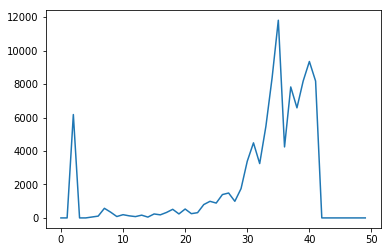

In [38]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

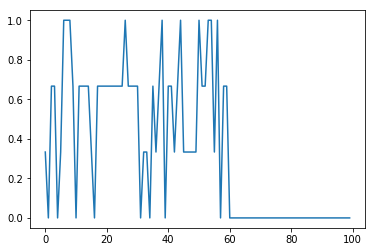

In [39]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [40]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 44, 'T': 35, 'G': 52, 'C': 49})

In [41]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [42]:
genome = readGenome('CERVICALDNA.fasta')

In [43]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [44]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [45]:
%%time
p = 'shake spea'
t = 'Shakespear'
naive(p,t)

Wall time: 0 ns


In [54]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [55]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [56]:
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [57]:
import collections
phix_reads = readFastq('CERVICALDNA.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'A': 44, 'T': 35, 'G': 52, 'C': 49})

In [58]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

3 / 3 reads matched the genome exactly!


In [59]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

3 / 3 reads matched the genome exactly!


In [60]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [61]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

3 / 3 reads matched the genome exactly!


In [62]:
import bisect

class findPatternV2 ():
    """
    This class finds the occurence and position of a given pattern in a given 
    genomic sequence in a file.
    """
    def __init__(self, pattern, filename = False):
        # initiate parameters
        self.pattern = pattern
        self.filename = filename
        
    def readGenome (self):
        """
        read genomic DNA sequence to a string
        """
        genome = ""
        with open (self.filename, "r") as f:
            for line in f:
                # skip header
                if not line[0] == ">":
                    genome += line.rstrip()
            f.close()
        return genome
        
    def naiveMatch (self, numberOfMismatch, text = False):
        """
        this is naive match to find the index of matched patterns in a genome
        and calculate number of total character comparisons and alignments
        """
        if text != False: #for test cases
            genome = text
        else:
            genome = self.readGenome()
        pattern = self.pattern
        occurences = []
        alignments = 0
        comparisons = 0
        for i in range(len(genome) - len(pattern) + 1):
            match = True
            counter = 0
            for j in range(len(pattern)):
                comparisons += 1
                if pattern[j] != genome[i+j]:
                    counter += 1
                if counter > numberOfMismatch:
                    match = False
                    break
            if match:
                occurences.append(i)
            alignments += 1
        return occurences, alignments, comparisons
        
    def boyerMoore (self, numberOfMismatch, bm, text = False):
        """
        this is naive match to find the index of matched patterns in a genome
        and calculate number of total character comparisons and alignments
        """
        i = 0
        if text != False: #for test cases
            genome = text
        else:
            genome = self.readGenome()
        pattern = self.pattern
        occurences = []
        alignments = 0
        comparisons = 0
        while i < len(genome) - len(pattern) + 1:
            shift = 1
            match = True
            for j in range(len(pattern) - 1, -1, -1):
                comparisons += 1
                if pattern[j] != genome[i+j]:
                    badCharacterSkip = bm.bad_character_rule(j, genome[i+j])
                    goodSuffixSkip = bm.good_suffix_rule(j)
                    shift = max(shift, badCharacterSkip, goodSuffixSkip)
                    match = False
                    break
            if match:
                occurences.append(i)
                goodSuffixSkip = bm.match_skip()
                shift = max(shift, goodSuffixSkip)
            i += shift
            alignments += 1
        return occurences, alignments, comparisons
        
    def matchedIndex(self, index, k_mer, pattern, isSubseqIndex):
        """
        find number of hits, occurences and time of occurence for a given pattern
        using string index in genome
        """
        genome = self.readGenome()
        occurences_match = []
        hit_index = []
        occurence_genome = []
        counter = 0
        if not isSubseqIndex:
            length = len(pattern)-k_mer + 1
        else:
            length = isSubseqIndex
        for i in range(length): # loop over to generate kmers
            if not isSubseqIndex:                
                pattern_q = pattern[i:i+k_mer]
            else:
                pattern_q = pattern[i:]
            hits = index.query(pattern_q) # query each kmer
            for hit in hits:
                counter += 1 #count total number of hits
                text = genome[hit-i : hit+len(pattern) -i]
                if hit-i not in hit_index: #avoid duplicated counts
                    hit_index.append(hit-i)
                    occurence, _, _ = self.naiveMatch(2,text)
                    occurences_match.extend(occurence)
                if len(occurence) != 0 and hit-i not in occurence_genome:
                    occurence_genome.append(hit-i) 
        return occurence_genome, len(occurences_match), counter
        
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits
    def genome_index(self):
         return self.index       

class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

if __name__ == "__main__":
    from bm_preproc import BoyerMoore
    #Questions 1-3
    filename = ("CERVICALDNA.fasta")
    #Q1: How many alignments does the naive exact matching algorithm try when 
    #matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    pattern = "GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG"
    patterns = findPatternV2(pattern, filename)
    print("Q1: The alignments for naive match algorithm is %d\n"%patterns.naiveMatch(0)[1])
    patterns = findPatternV2("GGCGCGGTGGCTCACGCCTGTAAT", filename)    
    
    #Q2: How many character comparisons does the naive exact matching algorithm 
    #try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    print("Q2: The characters comparisons for naive match algorithm is %d\n"%patterns.naiveMatch(0)[2])
    
    #How many alignments does Boyer-Moore try when matching the string 
    #GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG 
    #(derived from human Alu sequences) to the excerpt of human chromosome 1? 
    #(Don't consider reverse complements.)
    print("Q3: The Alignments for Boyer-Moore algorithm is %d\n"%patterns.boyerMoore(0, \
          BoyerMoore(pattern, "ACGT"))[1])
    
    #Q4: How many times does the string GGCGCGGTGGCTCACGCCTGTAAT, 
    #which is derived from a human Alu sequence, occur with up to 2 
    #substitutions in the excerpt of human chromosome 1? 
    #(Don't consider reverse complements here.)
    k_mer = 8      
    pattern = "GGCGCGGTGGCTCACGCCTGTAAT"
    genome = patterns.readGenome()
    index = Index(genome, k_mer)
    occurences, numberOfOccurs, numberOfhits = patterns.matchedIndex(index, \
                                               k_mer, pattern, isSubseqIndex = False)
    print("Q4: Within 2 mismatches, the string occurs %d times\n" %numberOfOccurs)
    
    #Q5:Using the instructions given in Question 4, how many total index hits 
    #are there when searching for occurrences of GGCGCGGTGGCTCACGCCTGTAAT with 
    #up to 2 substitutions in the excerpt of human chromosome 1?
    print("Q5: Within 2 mismatches, the total index hits are %d \n" %numberOfhits)
    
    #Q6: When using this function, how many total index hits are there when 
    #searching for GGCGCGGTGGCTCACGCCTGTAAT with up to 2 substitutions in the 
    #excerpt of human chromosome 1? (Again, don't consider reverse complements.)
    pattern = "GGCGCGGTGGCTCACGCCTGTAAT"
    k_mer = 8
    vial = 3
    index = SubseqIndex(genome, k_mer, vial)
    occurences, numberOfOccurs, numberOfhits = patterns.matchedIndex(index, \
                                               k_mer, pattern, isSubseqIndex = vial)

    print("Q6: Within 2 mismatches, the hits are %d\n" %numberOfhits)

Q1: The alignments for naive match algorithm is 533

Q2: The characters comparisons for naive match algorithm is 852

Q3: The Alignments for Boyer-Moore algorithm is 13

Q4: Within 2 mismatches, the string occurs 0 times

Q5: Within 2 mismatches, the total index hits are 0 

Q6: Within 2 mismatches, the hits are 0

